In [156]:
import pandas as pd

def load_dataset(filepath: str) -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
        print(f"Data loaded successfully from {filepath}")
        print(f"Shape: {df.shape}")
        return df
    except FileNotFoundError:
        print(f"File not found: {filepath}")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()


df = load_dataset("../data/raw/SuperStoreOrders.csv")
df.head()


Data loaded successfully from ../data/raw/SuperStoreOrders.csv
Shape: (51290, 21)


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [158]:
# remove the dollar sign and comma 
df['sales'] = df['sales'].replace(r'[\$,]', '', regex=True).astype(float)

In [159]:
# Standardise column names for consistency 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [160]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [161]:
# check the first 20 unique values in order_date column
df['order_date'].unique()[:20]

array(['1/1/2011', '2/1/2011', '3/1/2011', '4/1/2011', '5/1/2011',
       '6/1/2011', '7/1/2011', '8/1/2011', '9/1/2011', '10/1/2011',
       '11/1/2011', '12/1/2011', '13-01-2011', '14-01-2011', '15-01-2011',
       '16-01-2011', '17-01-2011', '18-01-2011', '19-01-2011',
       '20-01-2011'], dtype=object)

In [162]:
# check the first 20 unique values in ship_date column
df['ship_date'].unique()[:20]

array(['6/1/2011', '8/1/2011', '5/1/2011', '3/1/2011', '9/1/2011',
       '7/1/2011', '11/1/2011', '10/1/2011', '13-01-2011', '12/1/2011',
       '14-01-2011', '15-01-2011', '16-01-2011', '18-01-2011',
       '17-01-2011', '19-01-2011', '20-01-2011', '21-01-2011',
       '22-01-2011', '23-01-2011'], dtype=object)

In [163]:
# check for mixed date formats 
df['order_date_raw'] = df['order_date'].str.strip()
df['ship_date_raw'] = df['ship_date'].str.strip()

In [164]:
# Use regex to split the date parts and extract day and month
import re

def extract_day_month(date_str):
    try:
        parts = re.split(r'[-/]', date_str)
        if len(parts) != 3:
            return None, None
        day, month = int(parts[0]), int(parts[1])
        return day, month
    except:
        return None, None

df[['order_day', 'order_month']] = df['order_date_raw'].apply(lambda x: pd.Series(extract_day_month(x)))
df[['ship_day', 'ship_month']] = df['ship_date_raw'].apply(lambda x: pd.Series(extract_day_month(x)))

In [165]:
# Count Ambiguous vs. Unambiguous Dates
def is_ambiguous(day, month):
    return day is not None and month is not None and day <= 12 and month <= 12

df['order_ambiguous'] = df.apply(lambda row: is_ambiguous(row['order_day'], row['order_month']), axis=1)
df['ship_ambiguous'] = df.apply(lambda row: is_ambiguous(row['ship_day'], row['ship_month']), axis=1)

print("Order Date Ambiguous:", df['order_ambiguous'].sum())
print("Ship Date Ambiguous:", df['ship_ambiguous'].sum())

Order Date Ambiguous: 20067
Ship Date Ambiguous: 19834


In [166]:
# check for unambiguous
df[df['order_day'] > 12][['order_date_raw', 'order_day', 'order_month']].head()
df[df['ship_day'] > 12][['ship_date_raw', 'ship_day', 'ship_month']].head()

,ship_date_raw,ship_day,ship_month
52,13-01-2011,13,1
54,13-01-2011,13,1
57,13-01-2011,13,1
83,13-01-2011,13,1
85,14-01-2011,14,1


In [167]:
df['order_date'] = pd.to_datetime(df['order_date_raw'], format='mixed', dayfirst=True)

In [168]:
df[['order_date_raw', 'order_date']].sample(10)

,order_date_raw,order_date
14242,9/8/2012,2012-08-09
44561,18-09-2014,2014-09-18
46133,16-10-2014,2014-10-16
40823,7/7/2014,2014-07-07
2018,5/5/2011,2011-05-05
5132,12/9/2011,2011-09-12
14885,29-08-2012,2012-08-29
8011,8/12/2011,2011-12-08
8649,23-12-2011,2011-12-23
34890,10/2/2014,2014-02-10


In [169]:
# # Parse dates with mixed formats (slashes and dashes) using day-first (British) format to avoid ambiguity
df['order_date'] = pd.to_datetime(df['order_date'], format="mixed", dayfirst=True)
df['ship_date'] = pd.to_datetime(df['ship_date'], format="mixed", dayfirst=True)

In [170]:
df.isnull().sum()

order_id           0
order_date         0
ship_date          0
ship_mode          0
customer_name      0
segment            0
state              0
country            0
market             0
region             0
product_id         0
category           0
sub_category       0
product_name       0
sales              0
quantity           0
discount           0
profit             0
shipping_cost      0
order_priority     0
year               0
order_date_raw     0
ship_date_raw      0
order_day          0
order_month        0
ship_day           0
ship_month         0
order_ambiguous    0
ship_ambiguous     0
dtype: int64

In [171]:
# Extract year, month, and weekday from order_date, and calculate shipping_days as the difference between ship_date and order_date
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_weekday'] = df['order_date'].dt.day_name()

# Calculate shipping duration in days
df['ship_duration'] = (df['ship_date'] - df['order_date']).dt.days


In [172]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'order_date_raw', 'ship_date_raw', 'order_day', 'order_month',
       'ship_day', 'ship_month', 'order_ambiguous', 'ship_ambiguous',
       'order_year', 'order_weekday', 'ship_duration'],
      dtype='object')

In [173]:
df.dtypes

order_id                   object
order_date         datetime64[ns]
ship_date          datetime64[ns]
ship_mode                  object
customer_name              object
segment                    object
state                      object
country                    object
market                     object
region                     object
product_id                 object
category                   object
sub_category               object
product_name               object
sales                     float64
quantity                    int64
discount                  float64
profit                    float64
shipping_cost             float64
order_priority             object
year                        int64
order_date_raw             object
ship_date_raw              object
order_day                   int64
order_month                 int32
ship_day                    int64
ship_month                  int64
order_ambiguous              bool
ship_ambiguous               bool
order_year    

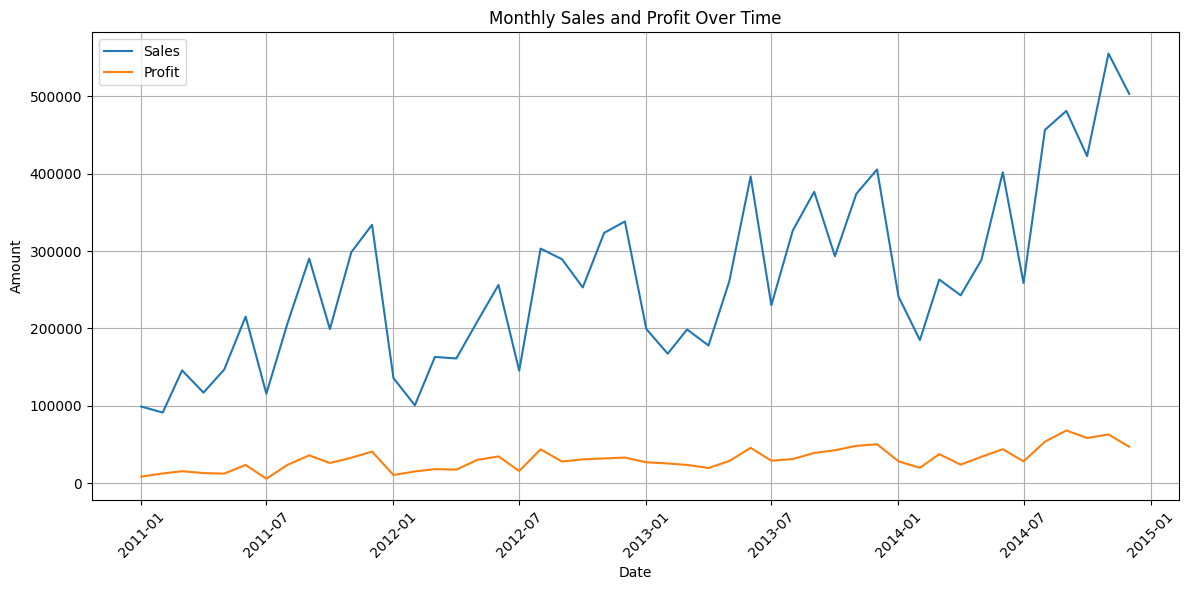

In [174]:
import matplotlib.pyplot as plt

# Group sales and profit by Year-Month
monthly_summary = (
    df.groupby(df['order_date'].dt.to_period('M'))
    .agg({'sales': 'sum', 'profit': 'sum'})
    .reset_index()
)

# Convert period to timestamp for plotting on datetime axis
monthly_summary['order_date'] = monthly_summary['order_date'].dt.to_timestamp()

# Plot sales and profit over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_summary['order_date'], monthly_summary['sales'], label='Sales')
plt.plot(monthly_summary['order_date'], monthly_summary['profit'], label='Profit')

plt.title('Monthly Sales and Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


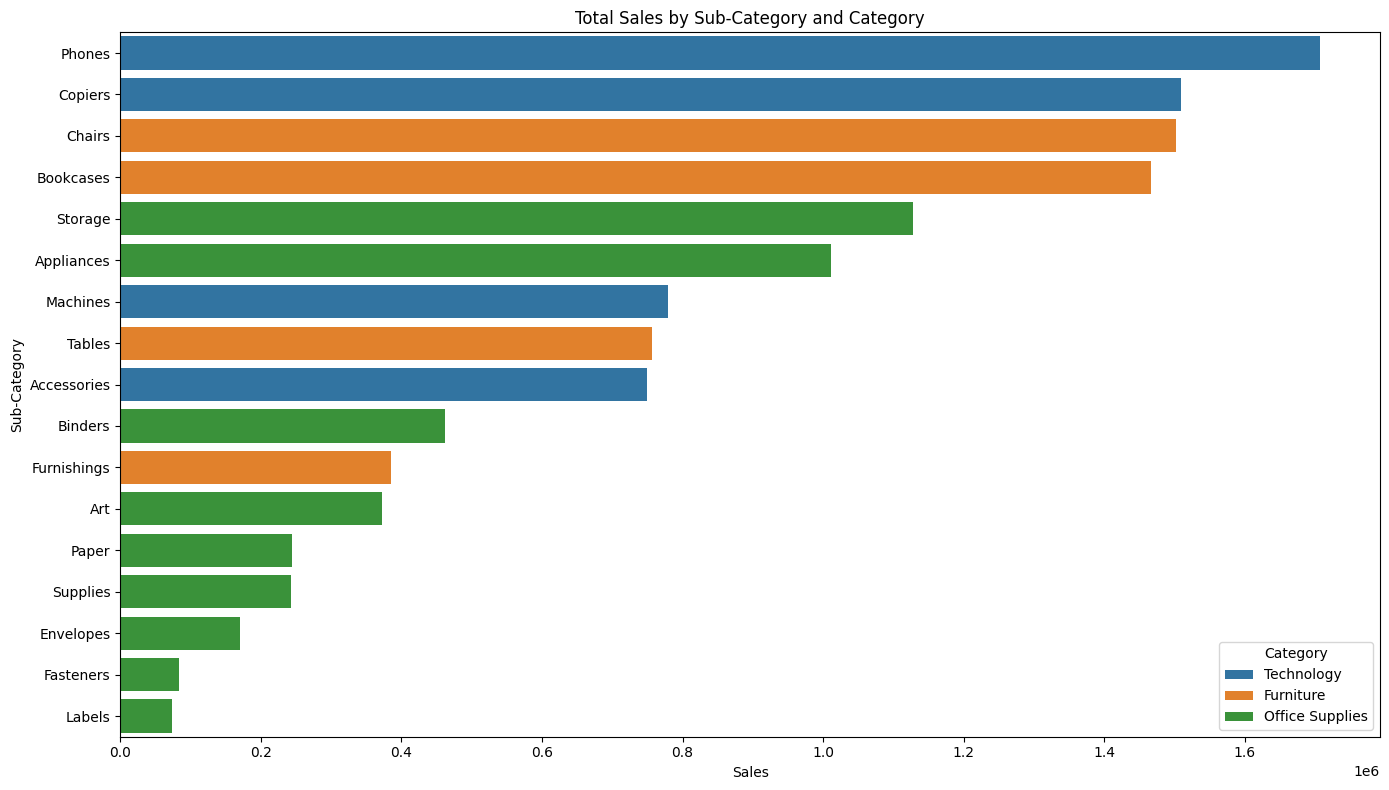

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate sales and profit by category and sub-category
category_summary = (
    df.groupby(['category', 'sub_category'])[['sales', 'profit']]
    .sum()
    .reset_index()
    .sort_values(by='sales', ascending=False)
)

# Set plot size
plt.figure(figsize=(14, 8))

# Barplot: Sales by Sub-Category (within Category)
sns.barplot(
    data=category_summary,
    x='sales',
    y='sub_category',
    hue='category',
    dodge=False
)

plt.title('Total Sales by Sub-Category and Category')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

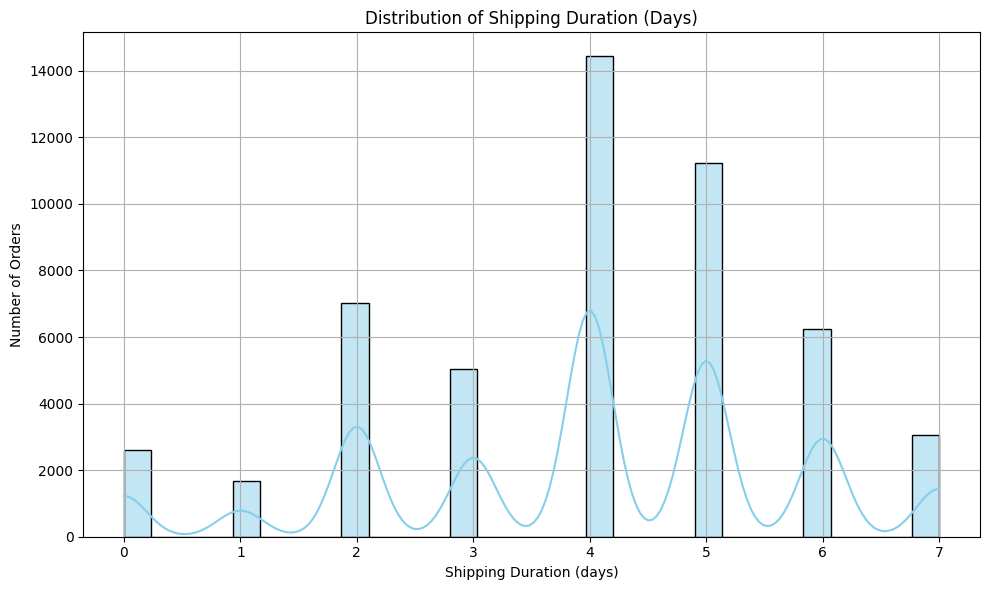

In [176]:
# Shipping Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ship_duration'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Shipping Duration (Days)')
plt.xlabel('Shipping Duration (days)')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

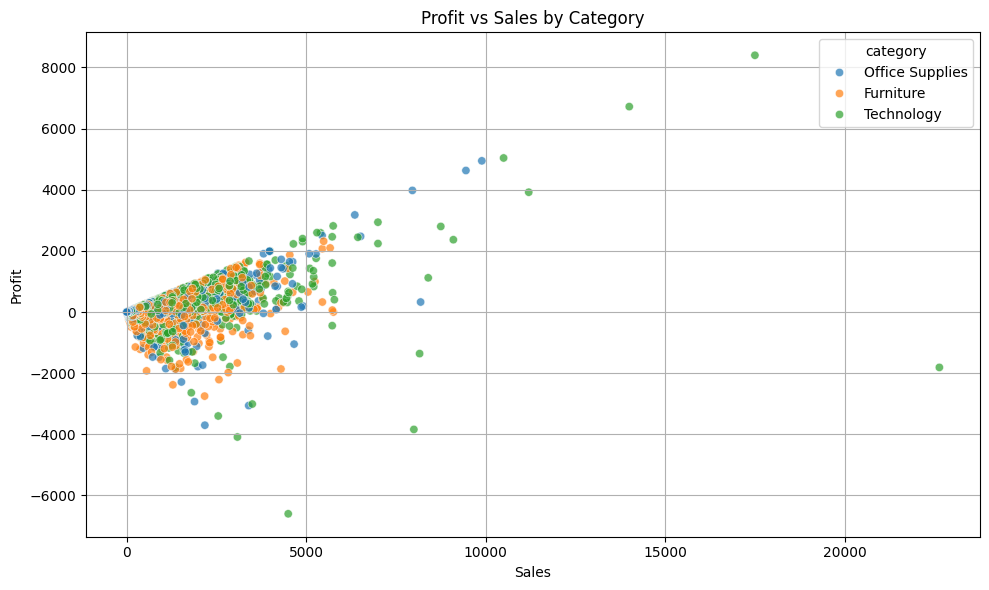

In [177]:
# Profitability: Profit vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sales', y='profit', hue='category', alpha=0.7)

plt.title('Profit vs Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/nz/xr9cwnmn4ln__b_sd5vm8xc00000gn/T/ipykernel_790/3691551123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ship_mode', y='ship_duration', palette='pastel')


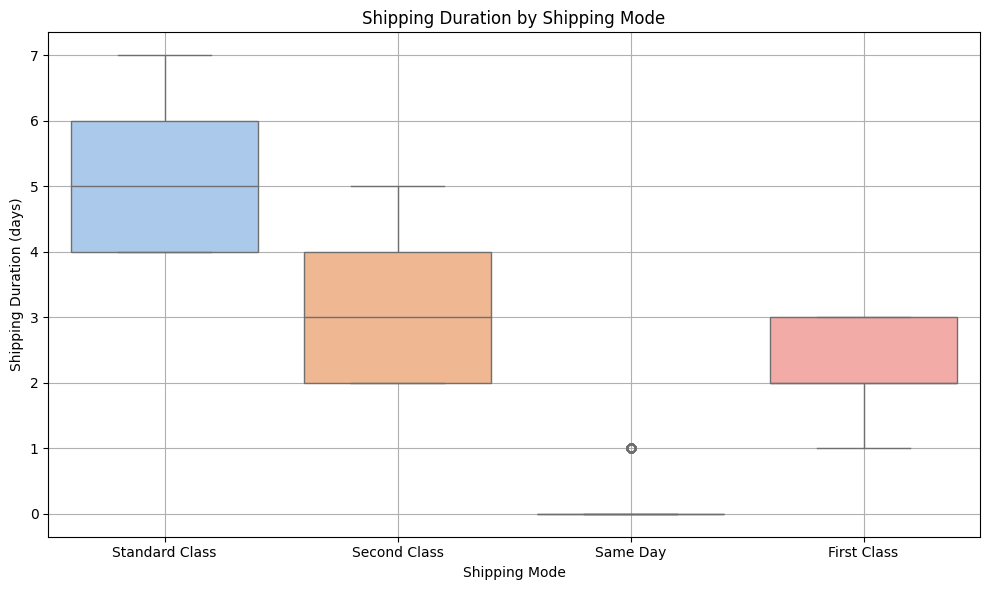

In [178]:
# Shipping Mode Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ship_mode', y='ship_duration', palette='pastel')

plt.title('Shipping Duration by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Shipping Duration (days)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [179]:
df.shape

(51290, 32)

In [180]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'order_date_raw', 'ship_date_raw', 'order_day', 'order_month',
       'ship_day', 'ship_month', 'order_ambiguous', 'ship_ambiguous',
       'order_year', 'order_weekday', 'ship_duration'],
      dtype='object')

In [182]:
columns_to_keep = [
    'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
    'segment', 'state', 'country', 'market', 'region', 'product_id',
    'category', 'sub_category', 'product_name', 'sales', 'quantity',
    'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
    'order_day', 'order_month', 'ship_day', 'ship_month',
    'order_year', 'order_weekday', 'ship_duration'
]

df = df[columns_to_keep]


In [183]:
df.shape

(51290, 28)

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()